# General data viz
In this file, I explore any and all other results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

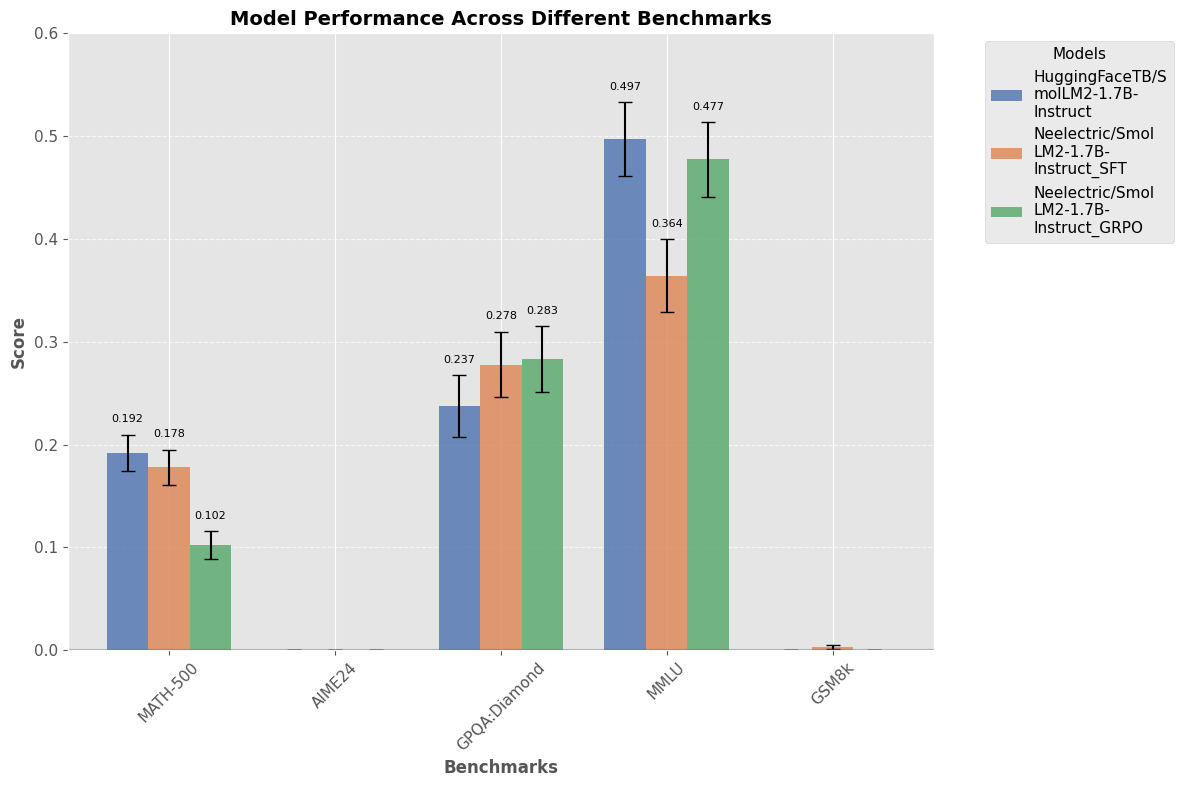

In [2]:
# Set the style
plt.style.use('ggplot')
sns.set_palette("deep")
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(12, 8))

# Data from the table
models = [
    'HuggingFaceTB/S\nmolLM2-1.7B-\nInstruct',
    'Neelectric/Smol\nLM2-1.7B-\nInstruct_SFT',
    'Neelectric/Smol\nLM2-1.7B-\nInstruct_GRPO'
]

# Create data arrays with mean and std dev
benchmarks = ['MATH-500', 'AIME24', 'GPQA:Diamond', 'MMLU', 'GSM8k']

# Mean values
data = np.array([
    [0.192, 0, 0.2374, 0.4971, 0.000],
    [0.178, 0, 0.2778, 0.3644, 0.003],
    [0.102, 0, 0.2828, 0.4775, 0.000]
])

# Standard deviations
errors = np.array([
    [0.0176, 0, 0.0303, 0.0363, 0.0000],
    [0.0171, 0, 0.0319, 0.0352, 0.0015],
    [0.0135, 0, 0.0321, 0.0364, 0.0000]
])

# Set up the bar positions
num_models = len(models)
num_benchmarks = len(benchmarks)
bar_width = 0.25
index = np.arange(num_benchmarks)

# Plot the bars for each model with error bars
for i in range(num_models):
    position = index + (i - 1) * bar_width
    plt.bar(position, data[i], bar_width, 
            alpha=0.8, 
            label=models[i],
            yerr=errors[i], 
            capsize=5)

# Add labels and title
plt.xlabel('Benchmarks', fontweight='bold', fontsize=12)
plt.ylabel('Score', fontweight='bold', fontsize=12)
plt.title('Model Performance Across Different Benchmarks', fontsize=14, fontweight='bold')
plt.xticks(index, benchmarks, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and add annotations
plt.tight_layout()

# Add value annotations above bars
for i in range(num_models):
    for j in range(num_benchmarks):
        height = data[i, j]
        if height > 0.01:  # Only annotate non-zero values
            plt.text(index[j] + (i - 1) * bar_width, height + errors[i, j] + 0.01, 
                    f'{height:.3f}', 
                    ha='center', va='bottom', 
                    fontsize=8, rotation=0)

# Improve the appearance
plt.ylim(0, 0.6)  # Set y-limit to make the chart more readable
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add a line at y=0

# Save the figure (optional)
# plt.savefig('model_benchmark_comparison.png', dpi=300, bbox_inches='tight')

plt.show()